### 01 Data Exploration & Visualization

**Goal:**  
Explore the chest X-ray dataset, understand class distribution, visualize random images, and gain initial insights for preprocessing and modeling.

- Dataset: `chest_xray/` (with `train/`, `test/`, `val/` subfolders)
- Classes: `NORMAL`, `PNEUMONIA`


In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Set style for plots
sns.set(style="whitegrid")


In [16]:
# Define dataset paths
base_dir = '../chest_xray'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

# Classes (folder names inside each split)
classes = ['NORMAL', 'PNEUMONIA']


In [18]:
# Function to count images in each class/folder
def count_images(data_dir):
    counts = {}
    for label in classes:
        label_dir = os.path.join(data_dir, label)
        counts[label] = len(os.listdir(label_dir))
    return counts

# Get image counts
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Display as DataFrame
df_counts = pd.DataFrame({
    'Train': train_counts,
    'Test': test_counts,
    'Validation': val_counts
})
df_counts


,Train,Test,Validation
NORMAL,1341,234,8
PNEUMONIA,3875,390,8


C:\Users\Revanth Kumar\AppData\Local\Temp\ipykernel_20136\1710033775.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


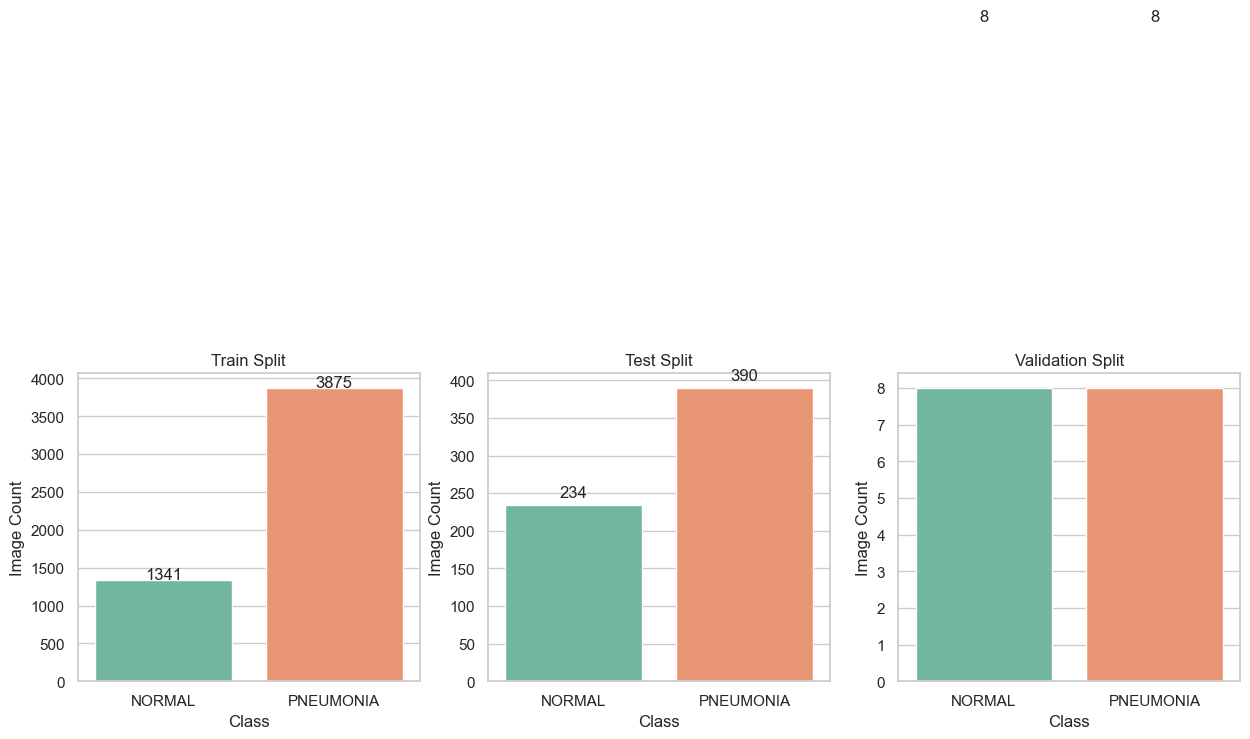

In [19]:
# Plot class distribution in each split
fig, axes = plt.subplots(1, 3, figsize=(15,4))
splits = ['Train', 'Test', 'Validation']
counts_list = [train_counts, test_counts, val_counts]

for ax, split, counts in zip(axes, splits, counts_list):
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), ax=ax, palette='Set2')
    ax.set_title(f'{split} Split')
    ax.set_ylabel('Image Count')
    ax.set_xlabel('Class')
    for i, v in enumerate(counts.values()):
        ax.text(i, v+10, str(v), ha='center')

plt.tight_layout()
plt.show()


In [20]:
# Function to get image shape info
def get_image_shapes(data_dir, num_samples=10):
    shapes = []
    for label in classes:
        label_dir = os.path.join(data_dir, label)
        files = os.listdir(label_dir)
        samples = random.sample(files, min(num_samples, len(files)))
        for f in samples:
            img_path = os.path.join(label_dir, f)
            try:
                img = Image.open(img_path)
                shapes.append((f"{label}", img.size))
            except:
                continue
    return shapes

# Sample image shapes from train set
image_shapes = get_image_shapes(train_dir)
pd.DataFrame(image_shapes, columns=['Class', 'Image Size']).head(10)


,Class,Image Size
0,NORMAL,"(1812, 1476)"
1,NORMAL,"(1240, 1064)"
2,NORMAL,"(1752, 1384)"
3,NORMAL,"(1654, 1446)"
4,NORMAL,"(1786, 1500)"
5,NORMAL,"(1878, 1647)"
6,NORMAL,"(1732, 1267)"
7,NORMAL,"(1778, 1461)"
8,NORMAL,"(1450, 1275)"
9,NORMAL,"(1700, 1368)"


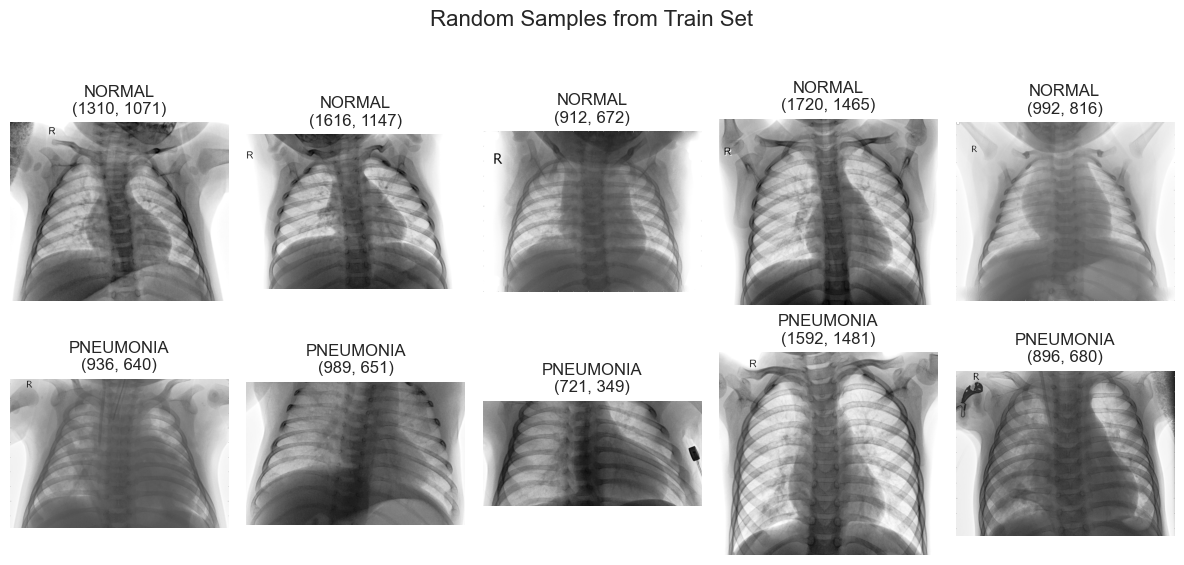

In [24]:
# Plot random images from both classes
n_samples = 5
plt.figure(figsize=(12,6))
for idx, label in enumerate(classes):
    label_dir = os.path.join(train_dir, label)
    sample_files = random.sample(os.listdir(label_dir), n_samples)
    for i, f in enumerate(sample_files):
        img = Image.open(os.path.join(label_dir, f))
        plt.subplot(2, n_samples, idx*n_samples + i + 1)
        plt.imshow(img.convert('L'), cmap='Greys')
        plt.title(f"{label}\n{img.size}")
        plt.axis('off')
plt.suptitle('Random Samples from Train Set', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [25]:
# Check for corrupted images in train set
def check_corrupted_images(data_dir):
    corrupted = []
    for label in classes:
        label_dir = os.path.join(data_dir, label)
        for fname in os.listdir(label_dir):
            fpath = os.path.join(label_dir, fname)
            try:
                img = Image.open(fpath)
                img.verify()  # Will not load image data, just verifies
            except (IOError, SyntaxError) as e:
                corrupted.append(fpath)
    return corrupted

corrupted_train = check_corrupted_images(train_dir)
print(f"Corrupted images in train: {len(corrupted_train)}")
if corrupted_train:
    print(corrupted_train)


Corrupted images in train: 0


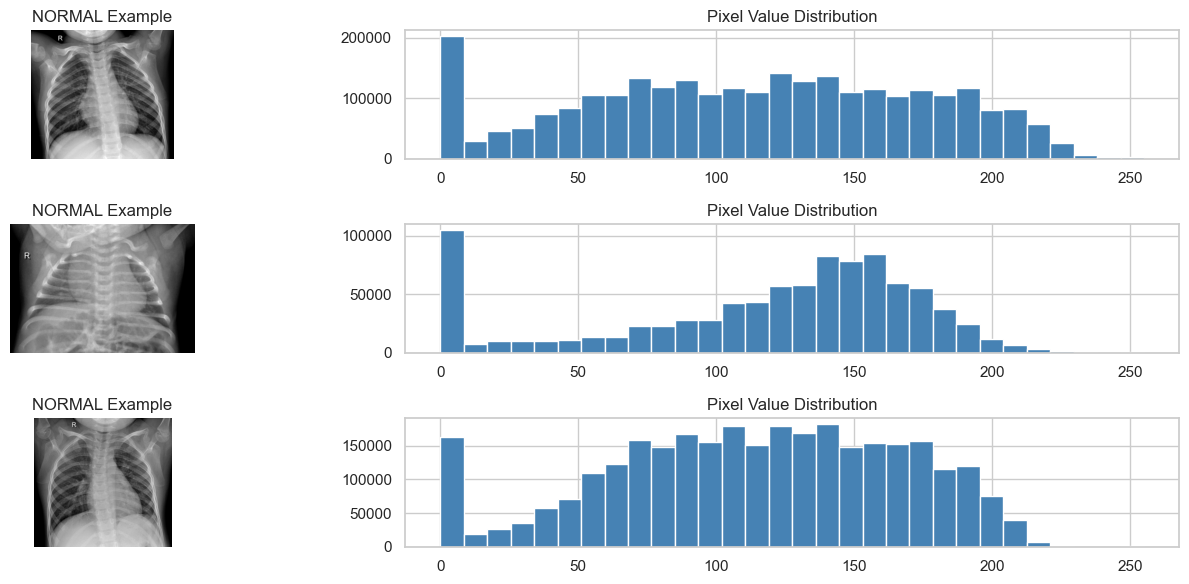

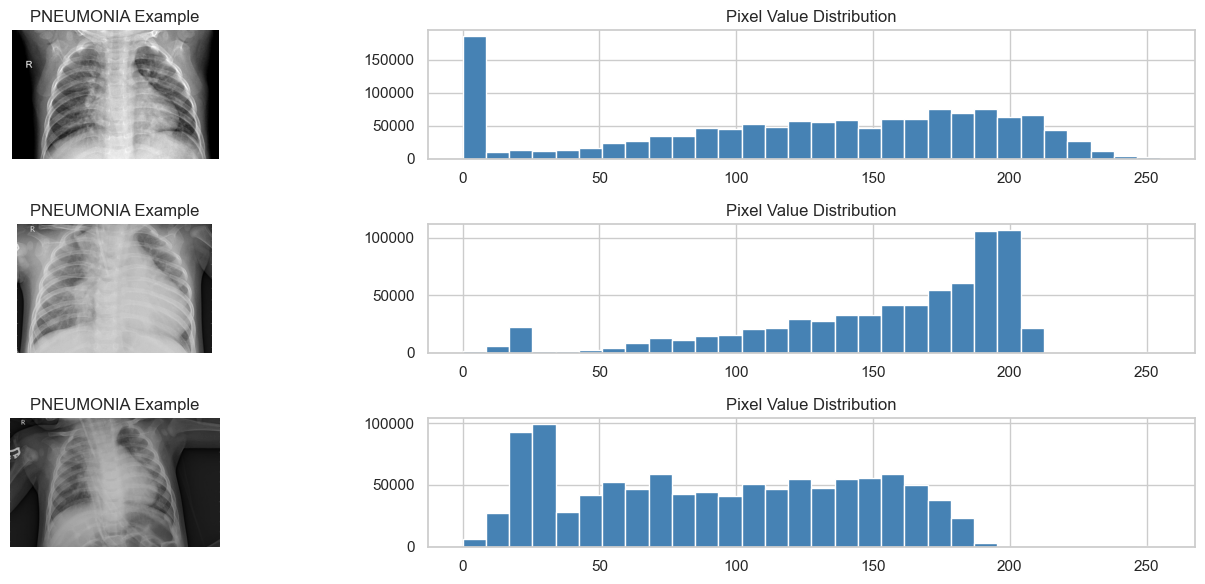

In [26]:
# Plot histogram of pixel values for random images from each class
def plot_intensity_histogram(data_dir, label, num_samples=5):
    label_dir = os.path.join(data_dir, label)
    sample_files = random.sample(os.listdir(label_dir), num_samples)
    plt.figure(figsize=(15, 2*num_samples))
    for i, f in enumerate(sample_files):
        img = Image.open(os.path.join(label_dir, f)).convert('L')
        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{label} Example")
        plt.axis('off')
        plt.subplot(num_samples, 2, 2*i+2)
        plt.hist(np.array(img).flatten(), bins=30, color='steelblue')
        plt.title("Pixel Value Distribution")
    plt.tight_layout()
    plt.show()

# Plot for NORMAL and PNEUMONIA
plot_intensity_histogram(train_dir, "NORMAL", 3)
plot_intensity_histogram(train_dir, "PNEUMONIA", 3)
